# Cost-Speed Trade-offs Across Tasks, Models, and Human-in-the-Loop Settings

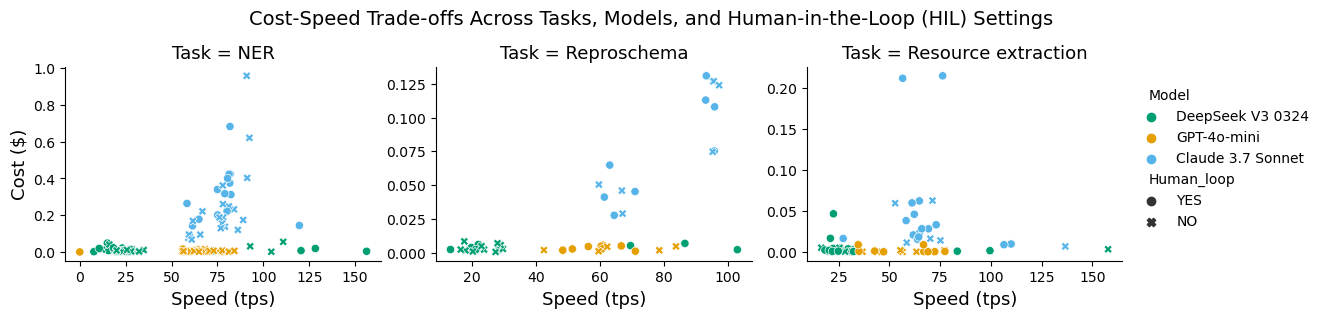

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("data/combined_all_csv.csv")

# Clean and convert necessary columns
df['Model'] = df['Model'].str.strip()
df['Speed (tps)'] = pd.to_numeric(df['Speed (tps)'], errors='coerce')
df['Cost ($)'] = pd.to_numeric(df['Cost ($)'], errors='coerce')

# Rename 'Human loop' to 'Human_loop' for easy access
df.rename(columns={'Human loop': 'Human_loop'}, inplace=True)

# Define your colorblind-friendly palette
model_colors = {
    'GPT-4o-mini': '#E69F00',            # Orange
    'Claude 3.7 Sonnet': '#56B4E9',      # Sky blue
    'DeepSeek V3 0324': '#009E73'        # Bluish green
}

# Apply compact publication-style font settings
plt.rcParams.update({
    'font.size': 10,
    'axes.titlesize': 13,
    'axes.labelsize': 13,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.titlesize': 10,
    'axes.grid': False,
    'axes.spines.top': False,
    'axes.spines.right': False
})

# Create the faceted scatter plot
g = sns.relplot(
    data=df,
    x="Speed (tps)",
    y="Cost ($)",
    hue="Model",
    style="Human_loop",
    col="Task",
    kind="scatter",
    palette=model_colors,
    facet_kws={'sharex': False, 'sharey': False},
    height=3.2,
    aspect=1.2
)


g.fig.subplots_adjust(top=0.80) 
g.fig.suptitle("Cost-Speed Trade-offs Across Tasks, Models, and Human-in-the-Loop (HIL) Settings", fontsize=14)


# Save to files
g.savefig("speed_vs_cost_by_task_and_human_in_loop.png", dpi=300, bbox_inches='tight')
g.savefig("speed_vs_cost_by_task_and_human_in_loop.svg", dpi=300, bbox_inches='tight')


#  Distribution of Cost, Speed, and Token Usage by Task and HIL Condition

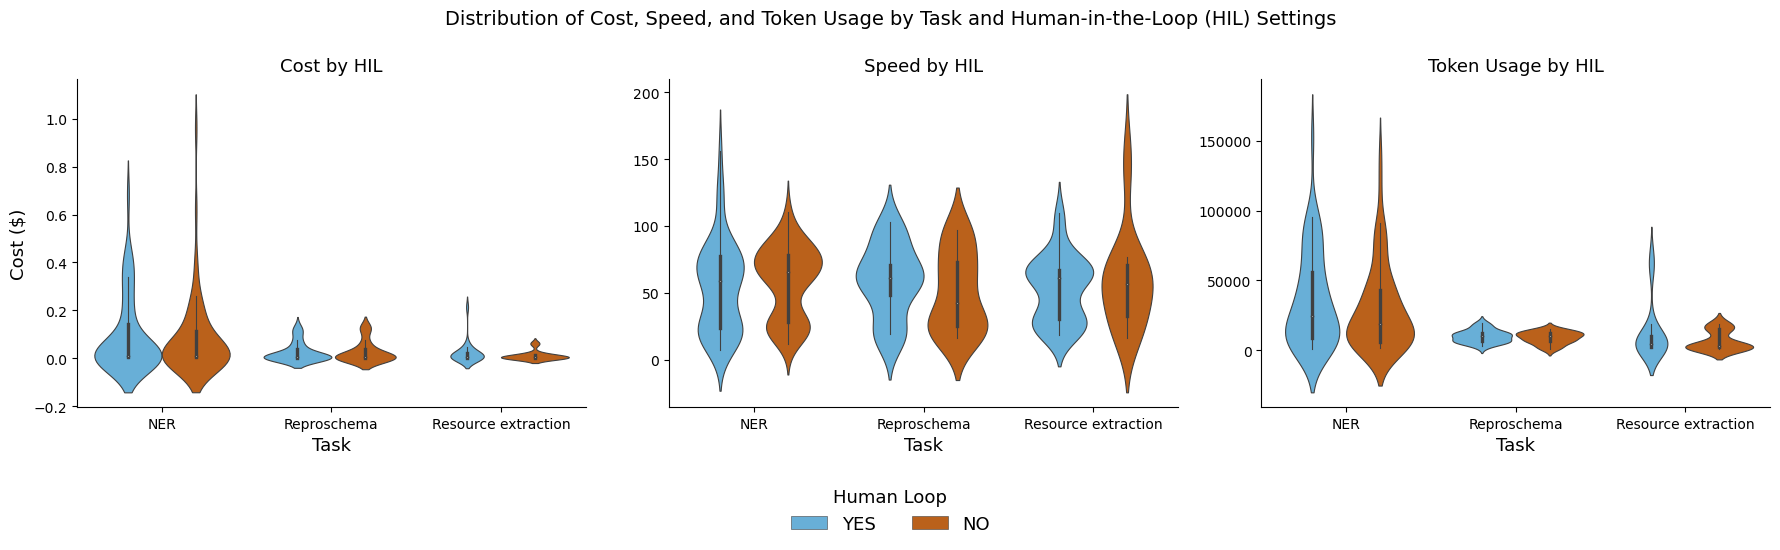

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and clean the data
df = pd.read_csv("data/combined_all_csv.csv")  # Adjust path if needed
df['Model'] = df['Model'].str.strip()
df.rename(columns={'Human loop': 'Human_loop'}, inplace=True)
df['Speed (tps)'] = pd.to_numeric(df['Speed (tps)'], errors='coerce')
df['Cost ($)'] = pd.to_numeric(df['Cost ($)'], errors='coerce')
df['Total Tokens'] = df['Input Tokens'] + df['Output Tokens']

df = df[
    (df['Cost ($)'] > 0) &
    (df['Speed (tps)'] > 0) &
    (df['Input Tokens'] > 0) &
    (df['Output Tokens'] > 0)
]

# Set seaborn and matplotlib styles
plt.rcParams.update({
    'font.size': 13,
    'axes.titlesize': 13,
    'axes.labelsize': 13,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 13,
    'figure.titlesize': 13,
    'axes.grid': False,
    'axes.spines.top': False,
    'axes.spines.right': False
})

# Define metrics and titles
metrics = ['Cost ($)', 'Speed (tps)', 'Total Tokens']
titles = ['Cost by HIL', 'Speed by HIL', 'Token Usage by HIL']

# Create horizontal layout with vertical violins
fig, axes = plt.subplots(1, len(metrics), figsize=(18, 5), sharey=False)

for i, (metric, title) in enumerate(zip(metrics, titles)):
    sns.violinplot(
        data=df, x="Task", y=metric, hue="Human_loop",
        palette={"YES": "#56B4E9", "NO": "#D55E00"},
        inner='box', linewidth=0.8, ax=axes[i]
    )
    axes[i].set_title(title, pad=6)
    axes[i].set_xlabel("Task")
    if i == 0:
        axes[i].set_ylabel(metric)
    else:
        axes[i].set_ylabel('')
    axes[i].legend_.remove()

# Create a shared legend horizontally at the center bottom
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(
    handles, labels, title='Human Loop',
    loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=2, frameon=False
)

fig.suptitle("Distribution of Cost, Speed, and Token Usage by Task and Human-in-the-Loop (HIL) Settings", fontsize=14)
fig.subplots_adjust(top=0.88)  # Adjust top to create space below the title

plt.tight_layout(rect=[0, 0.05, 1, 1])  # leave space at bottom for legend
plt.savefig("violin_vertical_side_by_side_centered_legend.png", dpi=300, bbox_inches='tight')
plt.savefig("violin_vertical_side_by_side_centered_legend.svg", dpi=300, bbox_inches='tight')
plt.show()


# Comparison of Human-in-the-Loop (HIL) Vs Non-Human-in-the-Loop Performance

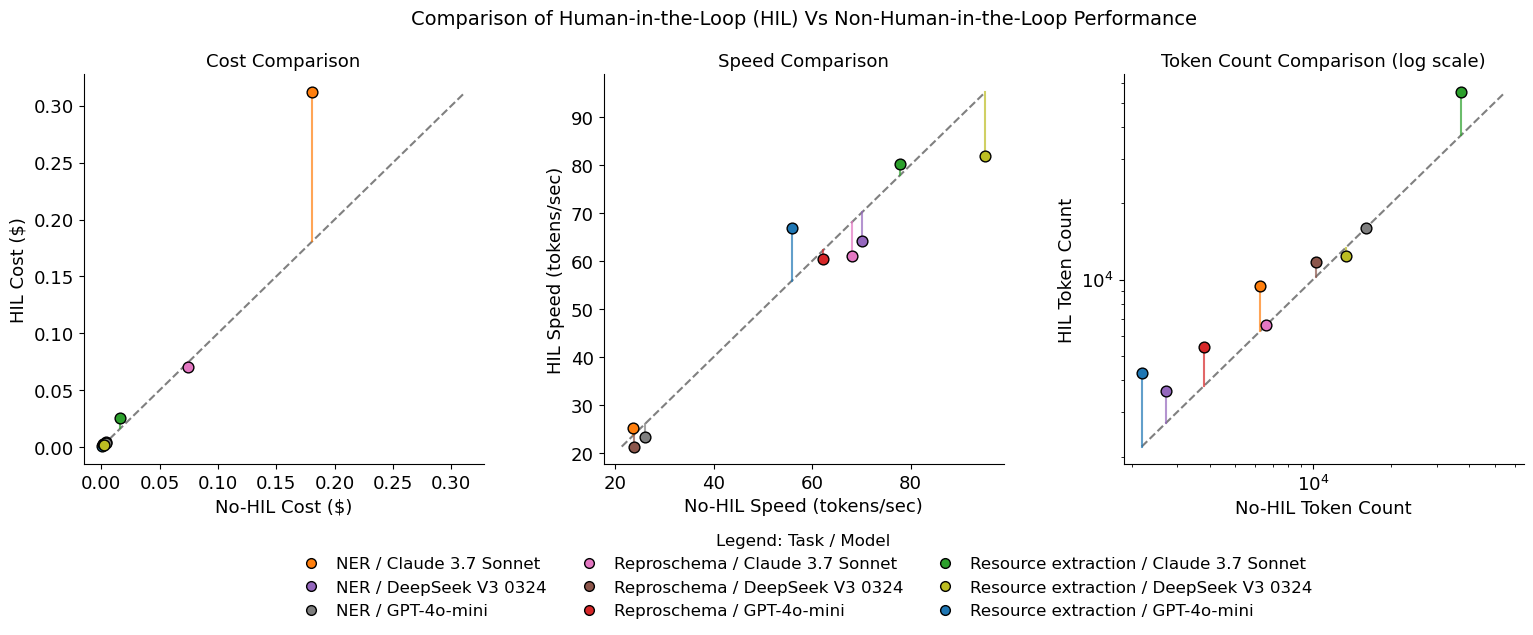

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from matplotlib.lines import Line2D
import matplotlib.patheffects as path_effects
import matplotlib.colors as mcolors
import numpy as np
from collections import defaultdict

# Load data and clean
df = pd.read_csv("data/combined_all_csv.csv")
df['Model'] = df['Model'].str.strip()
df.rename(columns={'Human loop': 'Human_loop'}, inplace=True)
df['Speed (tps)'] = pd.to_numeric(df['Speed (tps)'], errors='coerce')
df['Cost ($)'] = pd.to_numeric(df['Cost ($)'], errors='coerce')
df['Total Tokens'] = df['Input Tokens'] + df['Output Tokens']
df = df[
    (df['Cost ($)'] > 0) &
    (df['Speed (tps)'] > 0) &
    (df['Input Tokens'] > 0) &
    (df['Output Tokens'] > 0)
]

# Compute paired medians for HIL and No-HIL
paired_data = df.pivot_table(
    index=["Task", "Model"],
    columns="Human_loop",
    values=["Cost ($)", "Speed (tps)", "Total Tokens"],
    aggfunc="median"
).dropna()

# Plot settings
plt.rcParams.update({
    'font.size': 13,
    'axes.titlesize': 13,
    'axes.labelsize': 13,
    'xtick.labelsize': 13,
    'ytick.labelsize': 13,
    'legend.fontsize': 13,
    'figure.titlesize': 13,
    'axes.grid': False,
    'axes.spines.top': False,
    'axes.spines.right': False
})

# Create figure with proper spacing for legend
fig, axes = plt.subplots(1, 3, figsize=(16, 6.5))
plt.subplots_adjust(bottom=0.28, top=0.9, left=0.05, right=0.95, wspace=0.3)

plot_metrics = ["Cost ($)", "Speed (tps)", "Total Tokens"]
titles = ["Cost", "Speed", "Token Count"]
colors = sns.color_palette("tab10", len(paired_data))
legend_labels = []

for i, (metric, title) in enumerate(zip(plot_metrics, titles)):
    ax = axes[i]
    x = paired_data[(metric, "NO")]
    y = paired_data[(metric, "YES")]

    # Compute % delta and assign ranks
    deltas = ((y - x) / x * 100).sort_values(ascending=False)

    point_counts = defaultdict(int)
    point_offsets = {}
    offset_radius = 0.01
    for idx in deltas.index:
        x0 = x.loc[idx]
        y0 = y.loc[idx]
        key = (round(x0, 6), round(y0, 6))
        point_counts[key] += 1
    for key, count in point_counts.items():
        if count > 1:
            angles = np.linspace(0, 2 * np.pi, count, endpoint=False)
            point_offsets[key] = [(offset_radius * np.cos(a), offset_radius * np.sin(a)) for a in angles]
        else:
            point_offsets[key] = [(0, 0)]
    used_offsets = defaultdict(int)
    for idx, color in zip(deltas.index, colors):
        x0 = x.loc[idx]
        y0 = y.loc[idx]
        task, model = idx
        key = (round(x0, 6), round(y0, 6))
        offset_idx = used_offsets[key]
        dx, dy = point_offsets[key][offset_idx]
        used_offsets[key] += 1
        if y0 == x0:
            y1 = y0 + 1e-6
        else:
            y1 = y0
        ax.plot([x0, x0], [x0, y1], color=color, lw=1.5, alpha=0.7, zorder=2)
        ax.scatter(x0 + dx, y0 + dy, color=color, edgecolor="black", s=60, zorder=3)
        if i == 0:
            legend_labels.append((f"{task} / {model}", color, task, model))

    min_val = min(x.min(), y.min())
    max_val = max(x.max(), y.max())
    ax.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='gray', zorder=1)

    if metric == "Cost ($)":
        ax.set_xlabel("No-HIL Cost ($)")
        ax.set_ylabel("HIL Cost ($)")
        ax.set_title("Cost Comparison", loc='center')
    elif metric == "Speed (tps)":
        ax.set_xlabel("No-HIL Speed (tokens/sec)")
        ax.set_ylabel("HIL Speed (tokens/sec)")
        ax.set_title("Speed Comparison", loc='center')
    elif metric == "Total Tokens":
        ax.set_xlabel("No-HIL Token Count")
        ax.set_ylabel("HIL Token Count")
        ax.set_xscale("log")
        ax.set_yscale("log")
        ax.set_title("Token Count Comparison (log scale)", loc='center')

# Sort legend labels by task, then model
legend_labels.sort(key=lambda x: (x[2], x[3]))  # x[2] = task, x[3] = model

# Create legend handles
handles = [
    Line2D([0], [0], marker='o', color='w', label=label_text,
           markerfacecolor=color, markersize=7, markeredgecolor='black')
    for label_text, color, _, _ in legend_labels
]

# Add legend to the bottom center
legend = fig.legend(
    handles=handles,
    title="Legend: Task / Model",
    loc='lower center',
    bbox_to_anchor=(0.5, 0.02),
    ncol=3,
    fontsize=12,
    title_fontsize=12,
    frameon=False,
    columnspacing=1.5,
    handletextpad=0.5
)
fig.suptitle("Comparison of Human-in-the-Loop (HIL) Vs Non-Human-in-the-Loop Performance", fontsize=14)
fig.subplots_adjust(top=0.88)  # Adjust top to create space below the title


# Save plots
fig.savefig("hil_vs_nohil_scatter_horizontal_legend.png", dpi=300, bbox_inches='tight', pad_inches=0.1)
fig.savefig("hil_vs_nohil_scatter_horizontal_legend.svg", dpi=300, bbox_inches='tight', pad_inches=0.1)
